In [1]:
import sys
sys.path.append("./../")
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
from getdist import plots, MCSamples
import numpy as np
import zeus
print('zeus version:', zeus.__version__)

zeus version: 0.9.3


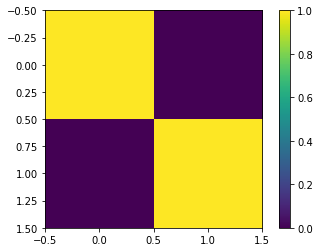

In [2]:
ndim = 2
nwalkers = 2*ndim
nsteps= 10000

#C = make_spd_matrix(ndim)
C = np.identity(ndim)
plt.imshow(C)
plt.colorbar()

icov = np.linalg.inv(C)

#mu = np.random.rand(ndim) * 100.0
mu  = np.zeros(ndim)

def logp(x, mu, icov):
    return -0.5 * np.dot(np.dot((x-mu).T,icov),(x-mu))

#start = np.random.rand(ndim)
start = mu + 3.0 * np.random.randn(nwalkers,ndim)

In [3]:
sampler = zeus.sampler(logp, nwalkers, ndim, args=[mu, icov])
sampler.run(start, nsteps)

Initialising ensemble of 4 walkers...
Sampling progress : 100%|██████████| 10000/10000 [00:01<00:00, 5431.66it/s]
Sampling Complete!


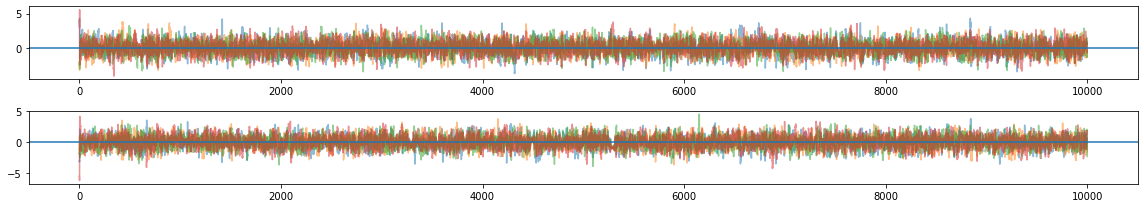

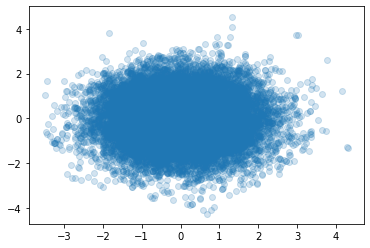

Summary
-------
Number of Generations: 10000
Number of Parameters: 2
Number of Walkers: 4
Mean Integrated Autocorrelation Time: 7.55
Effective Sample Size: 5294.79
Number of Log Probability Evaluations: 82529
Effective Samples per Log Probability Evaluation: 0.064157


MCMC mean: [ 0.00696446 -0.01751639]
TRUE mean: [0. 0.]
MCMC std: [0.99827362 1.01167664]
TRUE std: [1. 1.]


In [4]:
plt.figure(figsize=(16,1.5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(np.arange(nsteps),sampler.chain[:,:,n].T,alpha=0.5)
    plt.axhline(y=mu[n])
plt.tight_layout()
plt.show()

trace = sampler.flatten(burn=int(nsteps/2))
plt.scatter(trace[:,0],trace[:,1], alpha=0.2)
plt.show()

print('MCMC mean:', np.mean(trace, axis=0))
print('TRUE mean:', mu)
print('MCMC std:', np.std(trace, axis=0))
print('TRUE std:', np.sqrt(np.diag(C)))

sampler.summary

In [5]:
sampler.one_sigma

[(0.010702296985096199, 0.9762281797565485, 1.0110575407777318),
 (-0.03080191035690577, 1.0351298998751326, 0.9731880264483075)]

Removed no burn in


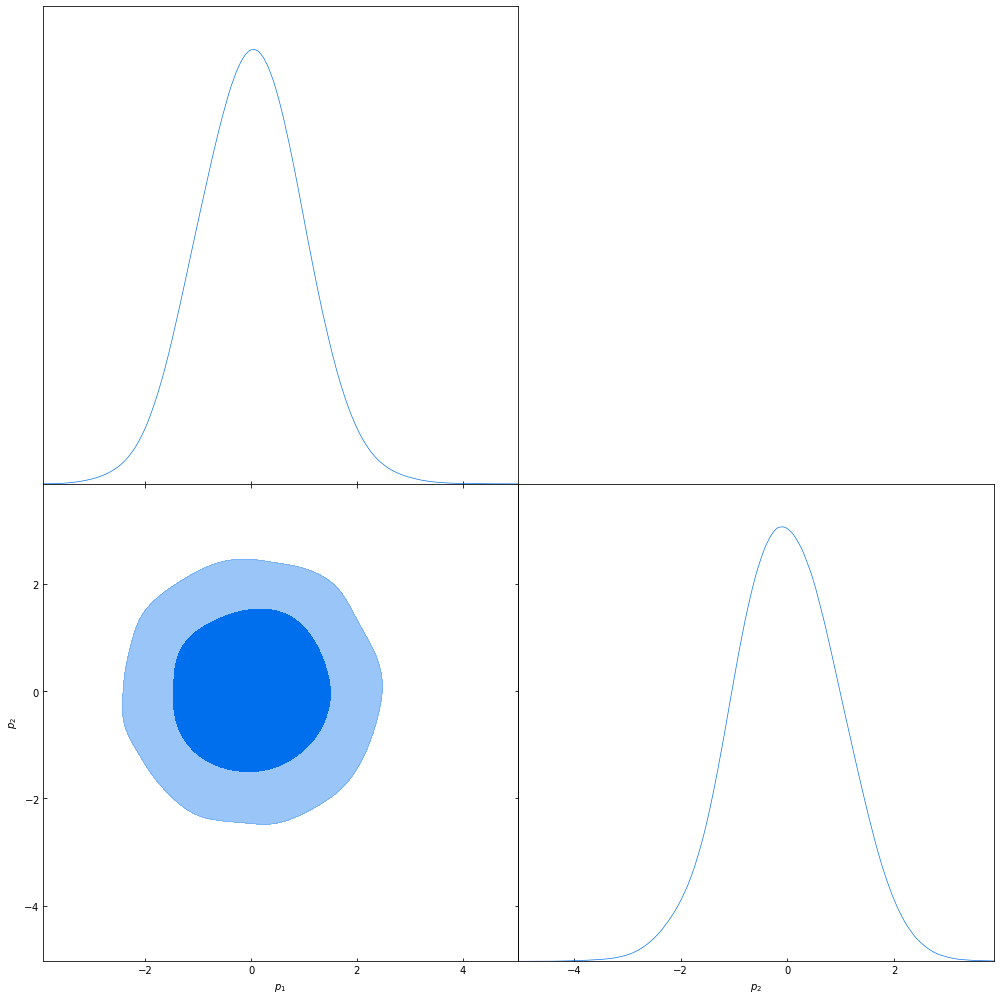

In [6]:
sample = MCSamples(samples=trace)
g = plots.getSubplotPlotter(width_inch=14)
g.triangle_plot([sample], filled=True, shaded=False)